##MF810 HW2

#Question (a)


In [72]:
import hw2
import torch
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [73]:
import importlib
importlib.reload( hw2 )

<module 'hw2' from '/workspaces/code_files_HW2_Ziyu Lin+Zhengyang Xue/hw2.py'>

In [74]:
##train a neural network on a dataset to >= 98% accuracy
#gain the train data
x = 2
x_train, y_train = hw2.make_dataset(version = x)
#x_train
#y_train

In [75]:
#gain the test data
x_test, y_test = hw2.make_dataset(test=True)

train accuracy: 99.0000 %


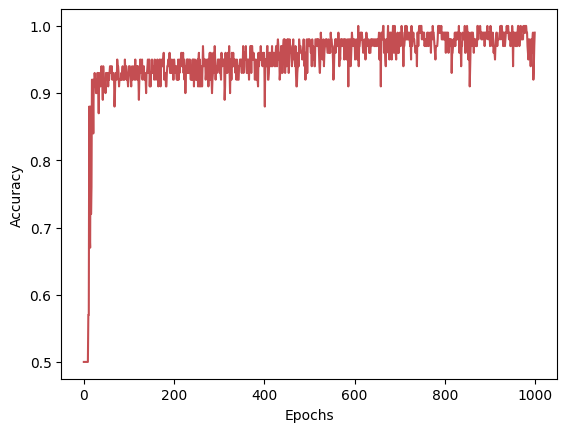

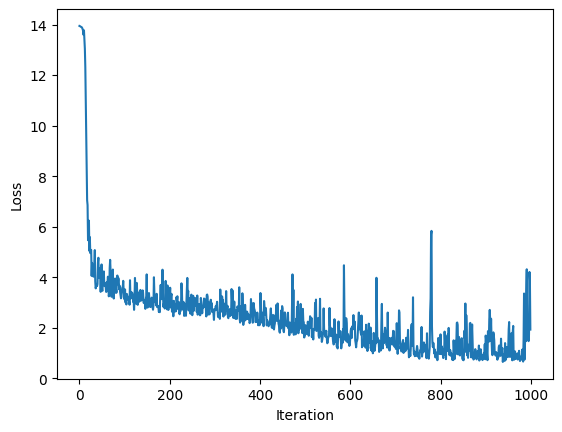

In [76]:
#Train the train data with neural network
# try a wider and deeper l method
##test classification dataset
#define the parmaeters for neural network
network = hw2.Neural_Network_98() # define the neural network model of make classification
lr = 0.01
optimizer = torch.optim.Adam( network.parameters() )
n_iter = 1000
batch_size = 5
num =10000
criterion = torch.nn.BCELoss()

n_epochs, training_accuracy, history= hw2.train(network, x_train, y_train, optimizer, criterion,\
                                                     n_iter, batch_size, num ) # train the model

epochs = list(range(n_epochs))
train_accuracy = training_accuracy[-1]*100
print('train accuracy: %.4f %%' % train_accuracy)
hw2.plot_train_log(epochs, training_accuracy)
hw2.show_loss(history)


In [77]:
#test data analysis
Xtest, Ytest= hw2.test(network, x_test, y_test, batch_size = 10)


Test accuracy: 0.9200000000000002


#### Question (b) : illustrate which points are correctly classified

In [78]:
import importlib
importlib.reload( hw2 )

<module 'hw2' from '/workspaces/code_files_HW2_Ziyu Lin+Zhengyang Xue/hw2.py'>

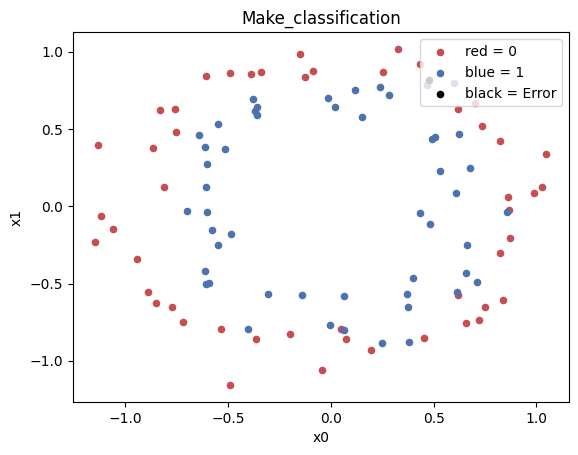

In [79]:
####Remeber to run the Make_classification function upperside before running this.
#visualize the output of classification
counter = Counter(y_train)
counter # count the classification

Xt = torch.tensor(x_train, dtype=torch.float)# change numpy Xtest in to tensor 
Ypred = network( Xt ).data # get the data of Y prediction

Ypred = Ypred.round()
#construct a dataframe collected all the classified data
x_0, x_1, x_2 = hw2.collect( x_train, Ypred, y_train )

ax1 = x_0.plot(x='x0', y = 'x1', kind = 'scatter', color='r', label = 'red = 0')
ax2 = x_1.plot(x='x0', y = 'x1', kind = 'scatter', color='b', label = 'blue = 1', ax=ax1)
x_2.plot(x='x0', y = 'x1', kind = 'scatter', color='black', label = 'black = Error', ax=ax2)
plt.title('Make_classification')
plt.legend(loc='upper right')
plt.show()

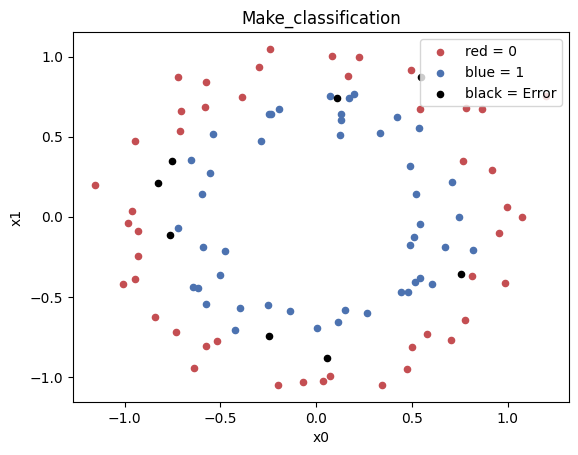

In [80]:
####Remeber to run the Make_classification function upperside before running this.
#visualize the output of classification
counter = Counter(Ytest)
counter # count the classification

Xt = torch.tensor(Xtest, dtype=torch.float)# change numpy Xtest in to tensor 
Ypred = network( Xt ).data # get the data of Y prediction

Ypred = Ypred.round()
#construct a dataframe collected all the classified data
x_0, x_1, x_2 = hw2.collect( Xtest, Ypred, Ytest )

ax1 = x_0.plot(x='x0', y = 'x1', kind = 'scatter', color='r', label = 'red = 0')
ax2 = x_1.plot(x='x0', y = 'x1', kind = 'scatter', color='b', label = 'blue = 1', ax=ax1)
x_2.plot(x='x0', y = 'x1', kind = 'scatter', color='black', label = 'black = Error', ax=ax2)
plt.title('Make_classification')
plt.legend(loc='upper right')
plt.show()

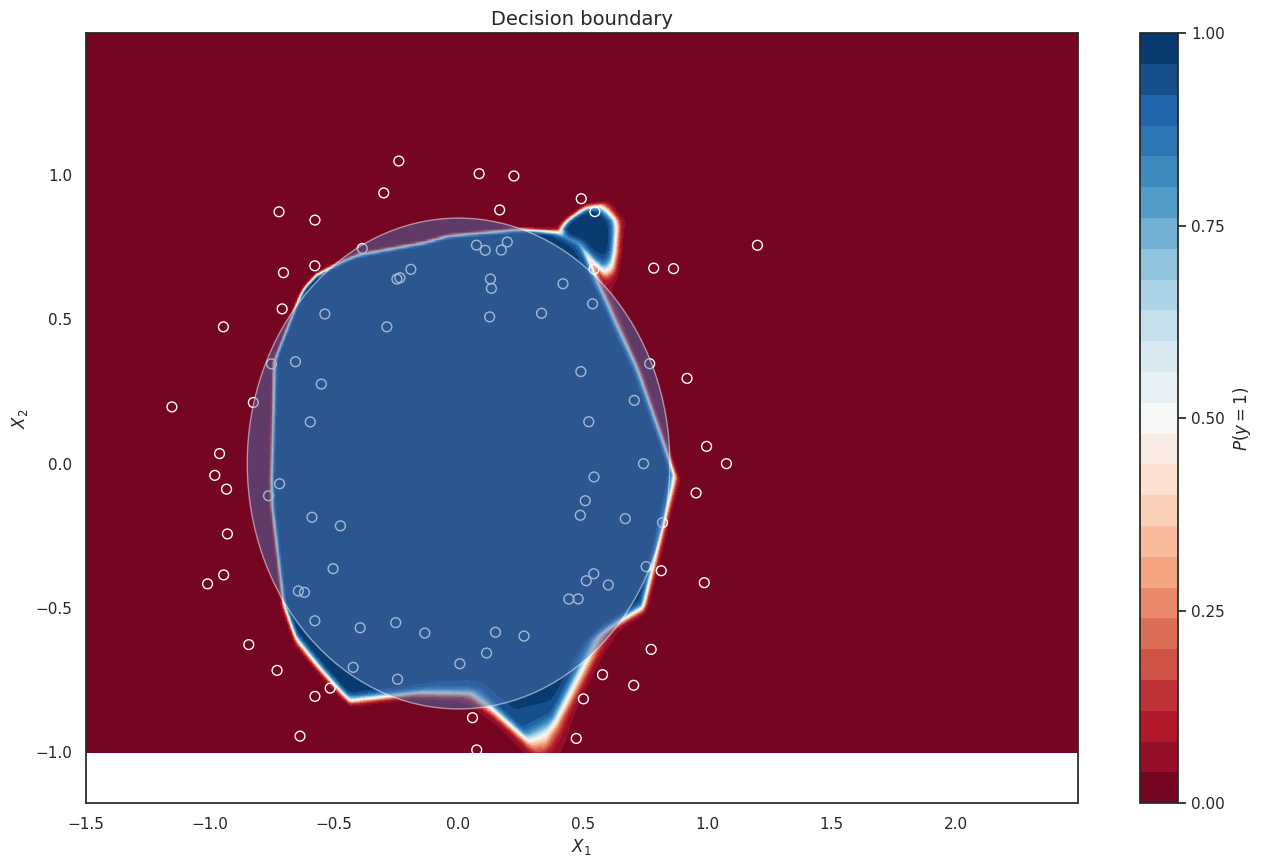

In [81]:
hw2.show_separation(network, Xtest, Ytest )

## Question (c) : illustrate the decision boundary.

In [82]:
import importlib
importlib.reload( hw2 )

<module 'hw2' from '/workspaces/code_files_HW2_Ziyu Lin+Zhengyang Xue/hw2.py'>

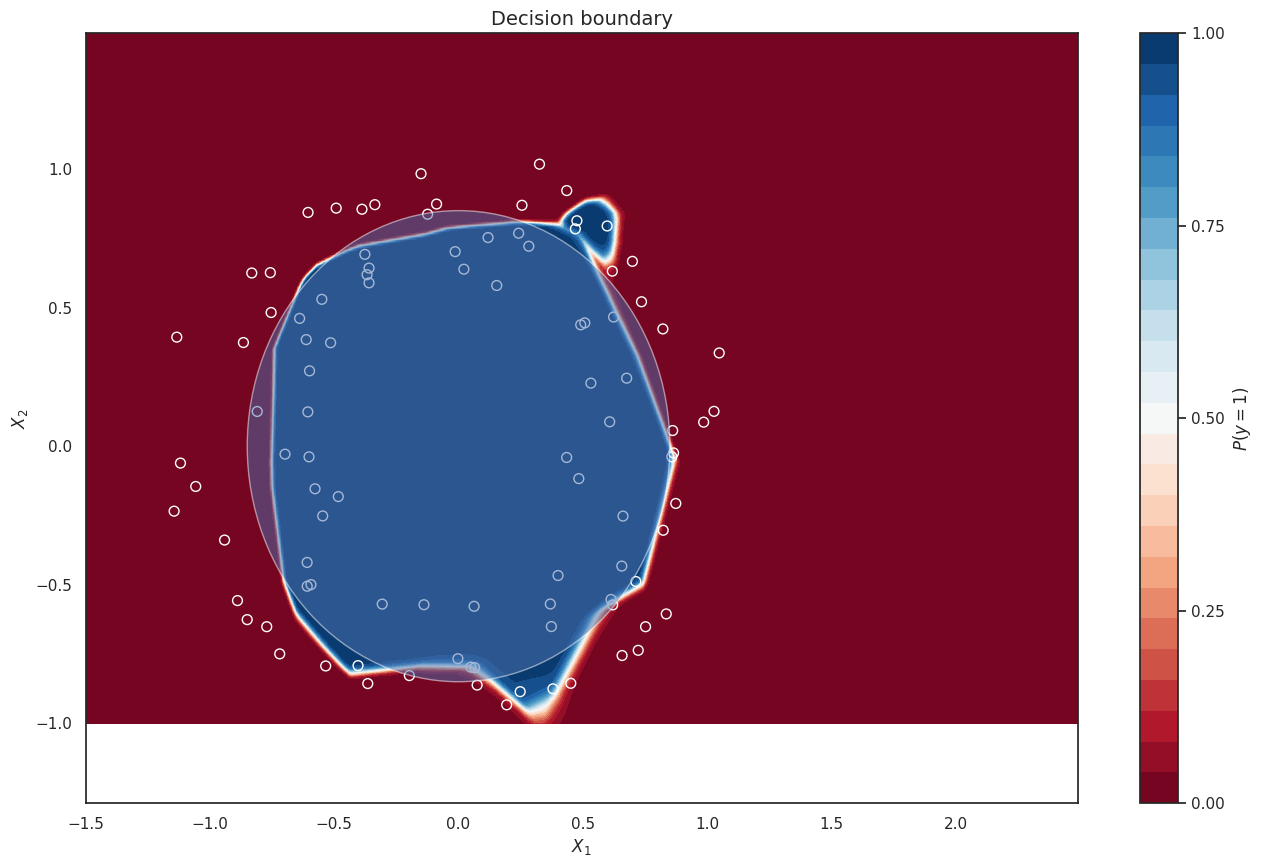

In [83]:
hw2.show_separation(network, x_train, y_train )

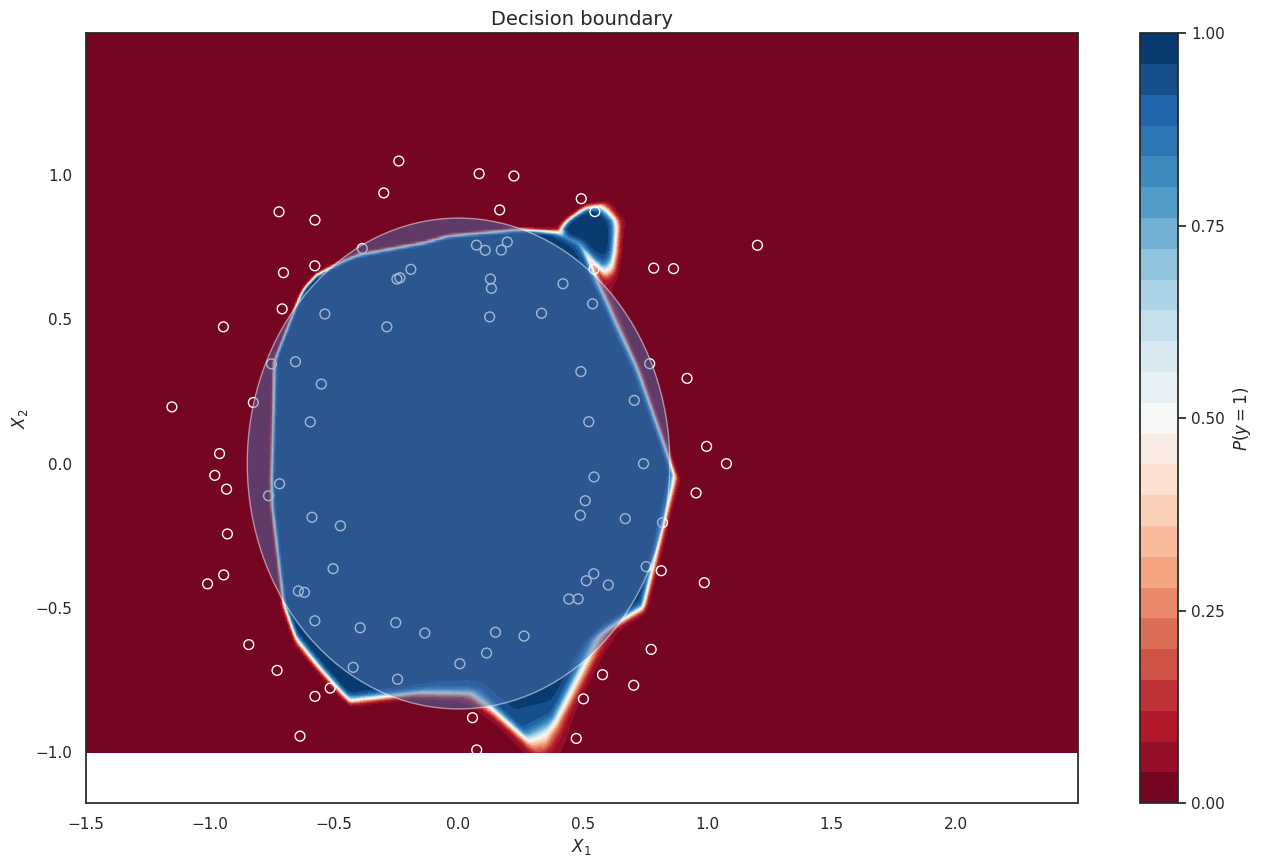

In [84]:
hw2.show_separation(network, Xtest, Ytest )

## Question (d):Create classifier manually

In [98]:
F_train = (x_train[:,0])**2 + (x_train[:, 1])**2
F_train_result = np.where(F_train>0.85**2, 0, 1)
F_train_result

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [99]:
sum_train = 0
for i in range(len(y_train)):
    
    if y_train[i] == F_train_result[i]:
        sum_train+=1
accuracy_manual_train = sum_train/len(y_train)
accuracy_manual_train

0.89

In [100]:
F_test = (x_test[:,0])**2 + (x_test[:, 1])**2
F_test_result = np.where(F_test>0.85**2, 0, 1)
F_test_result

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [101]:
sum_test = 0
for i in range(len(y_test)):
    
    if y_test[i] == F_test_result[i]:
        sum_test+=1
accuracy_manual_test = sum_test/len(y_test)
accuracy_manual_test

0.99

## Learn more: create model (not overfit)

In [87]:
import importlib
importlib.reload( hw2 )

<module 'hw2' from '/workspaces/code_files_HW2_Ziyu Lin+Zhengyang Xue/hw2.py'>

Dataset number: 1
Dataset number: 2
Dataset number: 0
Dataset number: 1
Dataset number: 0
Dataset number: 1
Dataset number: 1
Dataset number: 2
Dataset number: 1
Dataset number: 1
Dataset number: 2
Dataset number: 1
Dataset number: 0
Dataset number: 1
Dataset number: 1
Dataset number: 1
Dataset number: 0
Dataset number: 1
Dataset number: 0
Dataset number: 1
Dataset number: 0
Dataset number: 2
Dataset number: 2
Dataset number: 0
Dataset number: 2
Dataset number: 0
Dataset number: 1
Dataset number: 2
Dataset number: 0
Dataset number: 0
Dataset number: 0
Dataset number: 2
Dataset number: 0
Dataset number: 2
Dataset number: 0
Dataset number: 0
Dataset number: 2
Dataset number: 1
Dataset number: 2
Dataset number: 2
Dataset number: 2
Dataset number: 2
Dataset number: 2
Dataset number: 2
Dataset number: 1
Dataset number: 1
Dataset number: 2
Dataset number: 1
Dataset number: 1
Dataset number: 0
Dataset number: 2
Dataset number: 2
Dataset number: 0
Dataset number: 2
Dataset number: 1
Dataset nu

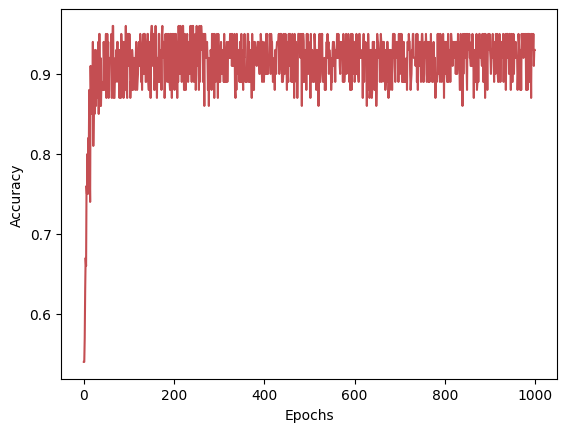

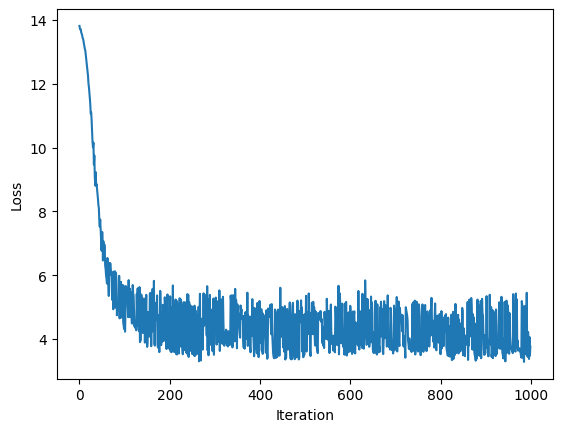

In [88]:
#Train the train data with neural network
# try a wider and deeper l method
##test classification dataset
#define the parmaeters for neural network
network = hw2.Neural_Network_manully() # define the neural network model of make classification
lr = 0.01
optimizer = torch.optim.Adam( network.parameters() )
n_iter = 1000
batch_size = 5
num =10000
criterion = torch.nn.BCELoss()

n_epochs, training_accuracy, history= hw2.train_manully(network, optimizer, criterion,\
                                                     n_iter, batch_size, num ) # train the model

epochs = list(range(n_epochs))
train_accuracy = training_accuracy[-1]*100
print('train accuracy: %.4f %%' % train_accuracy)
hw2.plot_train_log(epochs, training_accuracy)
hw2.show_loss(history)


In [114]:
#gain the test data
x_test, y_test = hw2.make_dataset(test=True)
#test data analysis
Xtest, Ytest= hw2.test(network, x_test, y_test, batch_size = 10)



Test accuracy: 0.9500000000000002
